In [ ]:
#Reading the data

In [2]:
import pandas as pd

path="https://raw.githubusercontent.com/rktrojan/DataSciencePython/main/DataFiles/insurance.csv"

df = pd.read_csv(path)
#df

# FEATURE ENCODING:
    

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
cleaned_df = df.drop_duplicates()
cleaned_df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
cleaned_df.corr()


,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


In [ ]:
# DATA ENCODING:

In [8]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


le = LabelEncoder()     #creating an object to LableEncoder class


Object `LabelEncoder()` not found.


In [9]:
le.fit(cleaned_df.region)

le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [10]:
le.transform(cleaned_df.region)

array([3, 2, 2, ..., 2, 3, 1])

In [11]:
cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)
cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)

cleaned_df["region_enc"] = le.fit_transform(cleaned_df.region)

C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_12240/3376705623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["sex_enc"] = le.fit_transform(cleaned_df.sex)
C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_12240/3376705623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["smoker_enc"] = le.fit_transform(cleaned_df.smoker)
C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_12240/3376705623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [12]:
cleaned_df

,age,sex,bmi,children,smoker,region,expenses,sex_enc,smoker_enc,region_enc
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,0,1
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,2
1336,21,female,25.8,0,no,southwest,2007.95,0,0,3


In [14]:
encoded_df = cleaned_df.drop(["sex","smoker","region"], axis=1) 
encoded_df

,age,bmi,children,expenses,sex_enc,smoker_enc,region_enc
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1
...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1
1334,18,31.9,0,2205.98,0,0,0
1335,18,36.9,0,1629.83,0,0,2
1336,21,25.8,0,2007.95,0,0,3


# DATA SCALING:
    # all column in same units size
    #manual scaling:devide each column with its max value.

In [15]:
encoded_df["age_sc"] = encoded_df.age/encoded_df.age.max()
encoded_df["bmi_sc"] = encoded_df.bmi/encoded_df.bmi.max()

encoded_df["expenses_sc"] = encoded_df.expenses/encoded_df.expenses.max()

In [16]:
encoded_df

,age,bmi,children,expenses,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,19,27.9,0,16884.92,0,1,3,0.296875,0.525424,0.264777
1,18,33.8,1,1725.55,1,0,2,0.281250,0.636535,0.027059
2,28,33.0,3,4449.46,1,0,2,0.437500,0.621469,0.069773
3,33,22.7,0,21984.47,1,0,1,0.515625,0.427495,0.344744
4,32,28.9,0,3866.86,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1,0.781250,0.583804,0.166230
1334,18,31.9,0,2205.98,0,0,0,0.281250,0.600753,0.034593
1335,18,36.9,0,1629.83,0,0,2,0.281250,0.694915,0.025558
1336,21,25.8,0,2007.95,0,0,3,0.328125,0.485876,0.031487


In [18]:

scaled_df = encoded_df.drop(["age","bmi","expenses"],axis=1)
scaled_df

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
0,0,0,1,3,0.296875,0.525424,0.264777
1,1,1,0,2,0.281250,0.636535,0.027059
2,3,1,0,2,0.437500,0.621469,0.069773
3,0,1,0,1,0.515625,0.427495,0.344744
4,0,1,0,1,0.500000,0.544256,0.060637
...,...,...,...,...,...,...,...
1333,3,1,0,1,0.781250,0.583804,0.166230
1334,0,0,0,0,0.281250,0.600753,0.034593
1335,0,0,0,2,0.281250,0.694915,0.025558
1336,0,0,0,3,0.328125,0.485876,0.031487


In [ ]:
data split in 2 parts - train and test

In [19]:
from sklearn.model_selection import train_test_split



train, test = train_test_split(scaled_df, test_size=.30, random_state=50)




#x_train,x_test,y_train,y_test = train_test_split(cleaned_df_x,cleaned_df_y,test_size=0.25, random_state=44)


In [20]:
train

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
852,0,0,1,0,0.718750,0.668550,0.660363
771,2,0,0,3,0.828125,0.502825,0.174858
33,0,1,0,1,0.984375,0.532957,0.215932
168,1,0,0,1,0.296875,0.598870,0.042642
830,0,1,0,3,0.984375,0.623352,0.210031
...,...,...,...,...,...,...,...
229,2,1,0,0,0.734375,0.480226,0.144664
70,0,0,1,2,0.421875,0.467043,0.259960
132,2,0,0,3,0.828125,0.676083,0.175059
1314,3,0,1,1,0.468750,0.446328,0.294272


In [21]:
train_X = train[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

train_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
852,0.718750,0.668550,0,0,1,0
771,0.828125,0.502825,2,0,0,3
33,0.984375,0.532957,0,1,0,1
168,0.296875,0.598870,1,0,0,1
830,0.984375,0.623352,0,1,0,3
...,...,...,...,...,...,...
229,0.734375,0.480226,2,1,0,0
70,0.421875,0.467043,0,0,1,2
132,0.828125,0.676083,2,0,0,3
1314,0.468750,0.446328,3,0,1,1


In [22]:
train_Y = train[["expenses_sc"]]
train_Y

,expenses_sc
852,0.660363
771,0.174858
33,0.215932
168,0.042642
830,0.210031
...,...
229,0.144664
70,0.259960
132,0.175059
1314,0.294272


In [24]:
test

,children,sex_enc,smoker_enc,region_enc,age_sc,bmi_sc,expenses_sc
1106,0,0,0,1,0.765625,0.563089,0.140946
1268,0,0,0,3,0.312500,0.627119,0.029488
287,0,0,0,1,0.984375,0.493409,0.223555
232,0,0,0,3,0.296875,0.335217,0.027094
849,0,1,0,1,0.859375,0.617702,0.166247
...,...,...,...,...,...,...,...
806,1,0,0,1,0.625000,0.779661,0.446551
1073,2,0,0,0,0.843750,0.544256,0.189691
339,1,0,0,2,0.718750,0.521657,0.129098
540,3,0,0,3,0.531250,0.715631,0.097168


In [25]:
test_X = test[["age_sc","bmi_sc","children","sex_enc","smoker_enc","region_enc"]]

test_X

,age_sc,bmi_sc,children,sex_enc,smoker_enc,region_enc
1106,0.765625,0.563089,0,0,0,1
1268,0.312500,0.627119,0,0,0,3
287,0.984375,0.493409,0,0,0,1
232,0.296875,0.335217,0,0,0,3
849,0.859375,0.617702,0,1,0,1
...,...,...,...,...,...,...
806,0.625000,0.779661,1,0,0,1
1073,0.843750,0.544256,2,0,0,0
339,0.718750,0.521657,1,0,0,2
540,0.531250,0.715631,3,0,0,3


In [26]:
test_Y = test[["expenses_sc"]]
test_Y

,expenses_sc
1106,0.140946
1268,0.029488
287,0.223555
232,0.027094
849,0.166247
...,...
806,0.446551
1073,0.189691
339,0.129098
540,0.097168


In [27]:
#this is array so, we need to convert into dataframe
actuals = pd.DataFrame(test_Y)

actuals.reset_index(inplace=True)

actuals.expenses_sc

0      0.140946
1      0.029488
2      0.223555
3      0.027094
4      0.166247
         ...   
397    0.446551
398    0.189691
399    0.129098
400    0.097168
401    0.276980
Name: expenses_sc, Length: 402, dtype: float64

# MODEL TRAINING PHASE

In [28]:
from sklearn.linear_model import  LinearRegression , Ridge, Lasso, ElasticNet

In [57]:
# RIDGE REGRESSION

RR = Ridge(alpha=10000,  solver="saga", random_state=7777, max_iter=20000)

#alpha--penalty parameter
#solver=algorithm using by model-stochastic average Gradient Descent Advanced
#random state=to shuffle the data for ech iteraion
#max_iter= no. of time that machine runs for loop to learn it

In [31]:
# generalisation/regularaisation methods:
these are not models.
??Ridge
??Lasso
??ElasticNet

#we can only regularise linear models. Not with non-linear models.

from sklearn.ensemble import RandomForestClassifier

??RandomForestClassifier

LASSO REGRESSION
lasso = Lasso(alpha=1)
***when in Ridge regression,alpha/lambda=0 ( which means penalty) then it behaves like a linear regression.
Lasso --similar to ridge--but penalise more for higher slopes by L1-norm generelization.
so, slopes almost near to 0, some of them =0



RIDGE + LASSO = ELASTICNET REGRESSION
elastic = ElasticNet(alpha=1, L1_ratio=.7)

elasticnet=----hybrid model--------   lasso+ridge regression 
L1-ratio=0 then it behave as lasso regression.
ideally=0.5
L1=1 then behaves like Ridge regression.


In [58]:
#train

RR.fit(train_X,train_Y)


Ridge(alpha=10000, max_iter=20000, random_state=7777, solver='saga')

In [60]:
RR.intercept_
print("intercept with ridge regression alpha=10000",RR.intercept_)
#this value depends on penality  
#when alpha decreases 10 then intercept is   array([-0.07911576])

intercept with ridge regression alpha=10000 [0.20257024]


In [61]:
#slopes


RR.coef_


array([[ 1.15574651e-03,  3.63366682e-04,  1.32104749e-03,
         6.63900096e-04,  5.49776672e-03, -7.08269348e-05]])

In [62]:
# TRAINING ACCURACY

print("TRAINING ACCURACY is ", RR.score(train_X,train_Y) )


TRAINING ACCURACY is  0.02054759538618789


In [ ]:
so, here traing accuracy is very less undersampling, we have to genralise it.

***-------------------------------------------------

# Plot the Data vs Regression Fit Line


In [65]:
import seaborn as sns

C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shireesha myadari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_sc', ylabel='expenses_sc'>

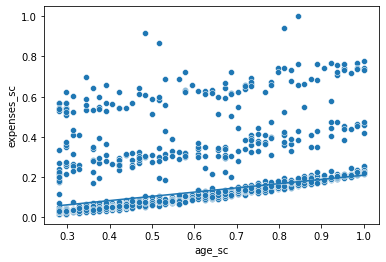

In [66]:
# AGE VS EXPENSES - TRAIN DATA

sns.scatterplot(train.age_sc,train.expenses_sc)

sns.lineplot(train.age_sc,0.21045374*train.age_sc)


In [ ]:
# BMI VS EXPENSES - TRAIN DATA

sns.scatterplot(train.bmi_sc,train.expenses_sc)

sns.lineplot(train.bmi_sc,0.14348869*train.bmi_sc)

In [ ]:
# BMI VS EXPENSES - TEST DATA

sns.scatterplot(test.bmi_sc,test.expenses_sc)

sns.lineplot(test.bmi_sc,0.14348869*test.bmi_sc)


In [ ]:
#Model Testing Phase

In [67]:
predicted = RR.predict(test_X)
predicted

array([[0.20358889],
       [0.2029468 ],
       [0.20381639],
       [0.20282267],
       [0.20438098],
       [0.21143673],
       [0.20487009],
       [0.21022133],
       [0.20378026],
       [0.20901902],
       [0.20985244],
       [0.20828082],
       [0.20476432],
       [0.21435871],
       [0.20309465],
       [0.20377905],
       [0.20950182],
       [0.21307888],
       [0.21076913],
       [0.20452537],
       [0.20674878],
       [0.21367423],
       [0.20760605],
       [0.20498449],
       [0.20494346],
       [0.20735544],
       [0.20559634],
       [0.20658237],
       [0.2037627 ],
       [0.20443376],
       [0.20508748],
       [0.20467589],
       [0.20301573],
       [0.20828995],
       [0.2042867 ],
       [0.20854018],
       [0.21236558],
       [0.20486823],
       [0.20498692],
       [0.20518115],
       [0.20739368],
       [0.20764673],
       [0.20762391],
       [0.20667734],
       [0.21319567],
       [0.20990228],
       [0.20337557],
       [0.203

In [68]:
predictions = pd.DataFrame(predicted, columns=["expenses"])

predictions

,expenses
0,0.203589
1,0.202947
2,0.203816
3,0.202823
4,0.204381
...,...
397,0.204826
398,0.206385
399,0.204770
400,0.207195


In [69]:
Error = test_Y - RR.predict(test_X)

Error

,index,expenses_sc
0,1105.796411,-0.062643
1,1267.797053,-0.173458
2,286.796184,0.019738
3,231.797177,-0.175729
4,848.795619,-0.038134
...,...,...
397,805.795174,0.241725
398,1072.793615,-0.016695
399,338.795230,-0.075672
400,539.792805,-0.110027


In [70]:
#error analysis

actuals.expenses_sc - predictions.expenses

0     -0.062643
1     -0.173458
2      0.019738
3     -0.175729
4     -0.038134
         ...   
397    0.241725
398   -0.016695
399   -0.075672
400   -0.110027
401    0.063757
Length: 402, dtype: float64

In [71]:
#ACTUAL vs PREDICTED values

pd.concat([pd.DataFrame(actuals["expenses_sc"]),predictions], axis=1)



,expenses_sc,expenses
0,0.140946,0.203589
1,0.029488,0.202947
2,0.223555,0.203816
3,0.027094,0.202823
4,0.166247,0.204381
...,...,...
397,0.446551,0.204826
398,0.189691,0.206385
399,0.129098,0.204770
400,0.097168,0.207195


# Test measurements
#error analysis

In [73]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


In [74]:
#MSE

mse= mean_squared_error(actuals.expenses_sc, predictions.expenses)


In [75]:
#RMSE

import math

rmse=math.sqrt(mse)

print(mse,"  ,  ",rmse)

0.036195399230218715   ,   0.19025088496566506


# Accuracy Anlysis

In [76]:
from sklearn.metrics import accuracy_score, r2_score

# lr.score(train, y~a+b)

# lr.score(train_X,train_Y)



#print(accuracy_score(actuals.expenses, predictions.expenses))

print("test accuracy is ", r2_score(actuals.expenses_sc, predictions.expenses))

#test accuracy


test accuracy is  0.018960940490143074
